# Projeto 3

### O objetivo deste trabalho é analisar esta base de dados (https://www.kaggle.com/fmena14/volcanoesvenus), que contém imagens de satélite da superfície de Vênus, e deseja-se estudar a ocorrência ou não de vulcões na superfície do planeta.

## Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import  confusion_matrix, plot_confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Ridge, Lasso, ElasticNet

from skimage.filters import unsharp_mask
from skimage.morphology import reconstruction

## Importando o DataSet


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/MyDrive/AMProjeto3

Mounted at /content/gdrive
/content/gdrive/MyDrive/AMProjeto3


### Variável Explicativa e Variável de resposta

In [ ]:
x_tr = pd.read_csv('train_images.csv', header = None) # Variável Explicativa - Treino
y_tr = pd.read_csv('train_labels.csv')['Volcano?'] # Variável de Resposta - Treino

x_tt = pd.read_csv('test_images.csv', header = None) # Variável Explicativa - Teste
y_tt = pd.read_csv('test_labels.csv')['Volcano?'] # Variável de Resposta - Teste

### Exemplo de uma imagem

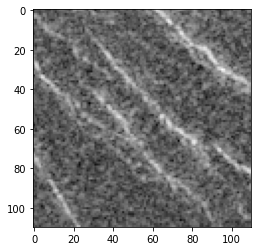

In [ ]:
j = np.random.randint(0,len(x_tr))

image = np.array(x_tr.iloc[j]).reshape((110,110))

plt.figure()
plt.imshow(image,cmap="gray")
plt.show()

## Análise Exploratória de Dados

### Variável Explicativa


In [ ]:
x_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 12100 entries, 0 to 12099
dtypes: int64(12100)
memory usage: 646.2 MB


In [ ]:
x_tr.describe()

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,99.983857,99.980571,100.013429,99.974143,100.08000,100.171286,100.059571,100.187143,100.552286,100.494286,...,100.252714,100.528286,100.589286,100.386000,100.286429,100.332429,100.437286,100.492143,100.145857,100.032143
std,26.499896,26.414896,26.408002,26.439919,26.51432,26.512484,26.631280,26.506073,26.457947,26.677367,...,25.473316,25.447919,25.308967,25.185476,25.096433,25.303697,25.401405,25.313594,25.119432,25.175735
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
50%,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,100.000000,100.000000,101.000000,101.000000,100.000000,100.000000
75%,115.000000,115.000000,115.000000,115.000000,115.00000,115.000000,115.000000,115.000000,116.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,114.000000,114.000000
max,190.000000,186.000000,186.000000,188.000000,192.00000,191.000000,197.000000,202.000000,202.000000,196.000000,...,199.000000,190.000000,184.000000,180.000000,182.000000,177.000000,182.000000,185.000000,179.000000,181.000000


Temos que cada pixel é um número variando de 0 até 255. A partir da análise da base de dados vamos dividir os valores nela por 255 para obtermos valores entre 0 e 1.

Obs.: Toda análise que estou fazendo para o conjunto de treino e aplicando mudanças estou repetindo as mesmas mudanças para o conjunto de teste

In [ ]:
x_tr = x_tr/255
x_tr

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.372549,0.396078,0.388235,0.403922,0.372549,0.337255,0.376471,0.349020,0.274510,0.407843,...,0.435294,0.419608,0.360784,0.349020,0.403922,0.388235,0.458824,0.454902,0.462745,0.376471
1,0.356863,0.360784,0.356863,0.349020,0.360784,0.364706,0.376471,0.396078,0.419608,0.407843,...,0.403922,0.360784,0.364706,0.372549,0.384314,0.411765,0.407843,0.392157,0.352941,0.317647
2,0.341176,0.274510,0.282353,0.290196,0.329412,0.305882,0.364706,0.407843,0.415686,0.415686,...,0.329412,0.278431,0.372549,0.400000,0.368627,0.313725,0.356863,0.313725,0.329412,0.352941
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.368627,0.317647,0.349020,0.329412,0.313725,0.352941,0.360784,0.313725,0.345098,0.376471
4,0.447059,0.462745,0.486275,0.466667,0.372549,0.462745,0.411765,0.454902,0.482353,0.439216,...,0.454902,0.443137,0.400000,0.364706,0.427451,0.407843,0.415686,0.458824,0.435294,0.450980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.352941,0.376471,0.345098,0.372549,0.368627,0.392157,0.372549,0.313725,0.313725,0.278431,...,0.345098,0.325490,0.282353,0.298039,0.286275,0.309804,0.298039,0.309804,0.329412,0.270588
6996,0.321569,0.321569,0.329412,0.356863,0.290196,0.239216,0.286275,0.313725,0.294118,0.380392,...,0.392157,0.305882,0.352941,0.345098,0.313725,0.345098,0.352941,0.352941,0.258824,0.278431
6997,0.521569,0.400000,0.474510,0.521569,0.505882,0.513725,0.384314,0.474510,0.482353,0.490196,...,0.470588,0.482353,0.466667,0.435294,0.407843,0.400000,0.466667,0.509804,0.513725,0.435294
6998,0.462745,0.458824,0.450980,0.419608,0.360784,0.298039,0.392157,0.400000,0.317647,0.415686,...,0.407843,0.411765,0.400000,0.435294,0.388235,0.352941,0.411765,0.392157,0.392157,0.427451


In [ ]:
x_tt = x_tt/255
x_tt

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.419608,0.454902,0.423529,0.396078,0.419608,0.427451,0.423529,0.431373,0.392157,0.427451,...,0.435294,0.431373,0.427451,0.427451,0.396078,0.415686,0.415686,0.458824,0.509804,0.525490
1,0.364706,0.372549,0.384314,0.392157,0.352941,0.392157,0.423529,0.384314,0.352941,0.403922,...,0.337255,0.364706,0.231373,0.345098,0.349020,0.349020,0.360784,0.388235,0.360784,0.443137
2,0.423529,0.423529,0.360784,0.454902,0.454902,0.549020,0.494118,0.407843,0.439216,0.403922,...,0.462745,0.435294,0.443137,0.419608,0.419608,0.474510,0.552941,0.627451,0.513725,0.541176
3,0.647059,0.643137,0.611765,0.623529,0.592157,0.470588,0.403922,0.447059,0.447059,0.454902,...,0.270588,0.376471,0.427451,0.356863,0.368627,0.325490,0.188235,0.270588,0.337255,0.294118
4,0.411765,0.415686,0.329412,0.450980,0.474510,0.403922,0.368627,0.423529,0.403922,0.356863,...,0.360784,0.349020,0.376471,0.349020,0.356863,0.400000,0.388235,0.352941,0.352941,0.286275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,0.341176,0.337255,0.349020,0.325490,0.349020,0.372549,0.372549,0.349020,0.337255,0.349020,...,0.286275,0.325490,0.317647,0.274510,0.274510,0.313725,0.321569,0.317647,0.298039,0.325490
2730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2731,0.478431,0.403922,0.462745,0.474510,0.494118,0.498039,0.439216,0.462745,0.388235,0.415686,...,0.490196,0.466667,0.490196,0.545098,0.478431,0.447059,0.435294,0.482353,0.529412,0.521569
2732,0.588235,0.623529,0.686275,0.682353,0.650980,0.643137,0.572549,0.662745,0.623529,0.454902,...,0.627451,0.650980,0.670588,0.588235,0.588235,0.670588,0.701961,0.654902,0.615686,0.615686


## Processamento da Imagem

### Aumento da contraste

### Investigação de como funciona os parâmetros da função Unsharp_Mask

In [ ]:
img = np.array(x_tr.iloc[9]).reshape((110,110))

img1 = unsharp_mask(img, radius=10, amount=5)
img2 = unsharp_mask(img, radius=20, amount=20)
img3 = unsharp_mask(img, radius=100, amount=100)


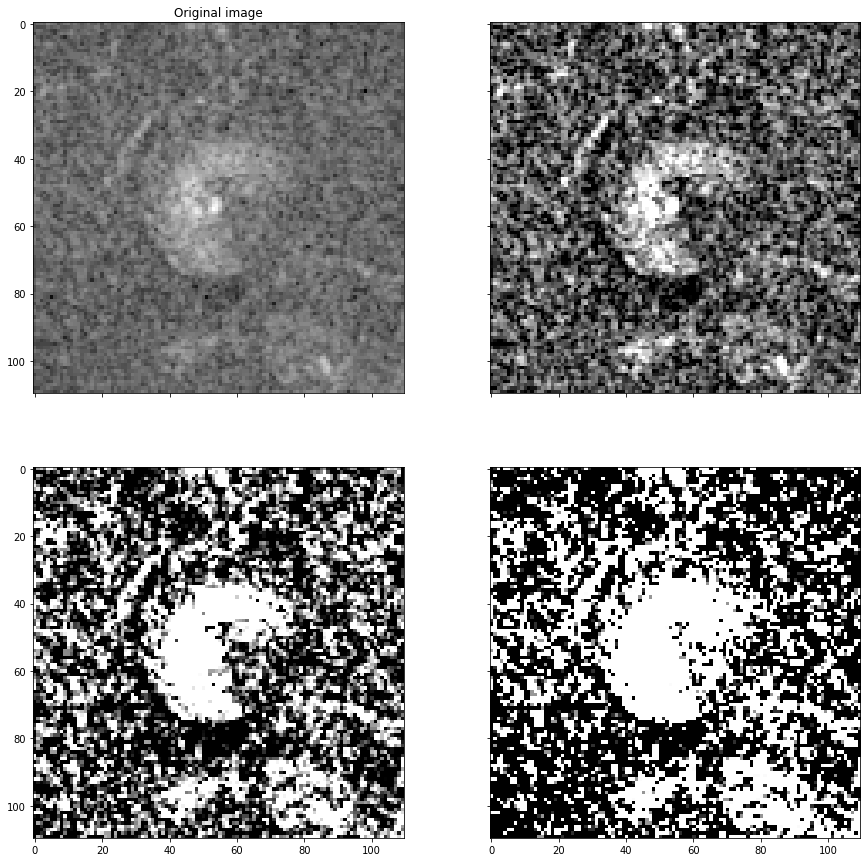

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(img1, cmap=plt.cm.gray)
ax[2].imshow(img2, cmap=plt.cm.gray)
ax[3].imshow(img3, cmap=plt.cm.gray)


Testei alguns valores para os parâmetros do unsharp mask e percebi que quanto maior os valores, maior será o contraste entre as cores branca e preta. Dessa forma iremos utilizar um valor alto tanto para "radius" quanto para "amount"

In [ ]:
nit_x_tr = []
nit_x_tt = []

for i in range(len(x_tr)):
  img_tr = np.array(x_tr.iloc[i]).reshape((110,110))
  img_tr = unsharp_mask(img_tr, radius=20, amount=20)
  nit_x_tr.append(img_tr.flatten())

nit_x_tr = pd.DataFrame(nit_x_tr)

for i in range(len(x_tt)):
  img_tt = np.array(x_tt.iloc[i]).reshape((110,110))
  img_tt = unsharp_mask(img_tt, radius=15, amount=10)
  nit_x_tt.append(img_tt.flatten())

nit_x_tt = pd.DataFrame(nit_x_tt)

In [ ]:
nit_x_tr

,0,1,2,3,4,5,6,7,8,9,...,12090,12091,12092,12093,12094,12095,12096,12097,12098,12099
0,0.455097,0.948892,0.783540,1.000000,0.451871,0.000000,0.530712,0.000000,0.000000,1.000000,...,1.000000,0.838420,0.000000,0.000000,0.502201,0.171147,1.000000,1.000000,1.000000,0.000000
1,0.283049,0.365318,0.282796,0.117836,0.364554,0.446481,0.693029,1.000000,1.000000,1.000000,...,0.820971,0.000000,0.000000,0.156497,0.402132,0.977410,0.894100,0.563969,0.000000,0.000000
2,0.296557,0.000000,0.000000,0.000000,0.052096,0.000000,0.796070,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.697039,1.000000,0.615376,0.000000,0.368811,0.000000,0.000000,0.286795
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.093871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.269786
4,0.509251,0.838970,1.000000,0.922870,0.000000,0.843375,0.000000,0.682954,1.000000,0.359418,...,1.000000,0.780671,0.000000,0.000000,0.458081,0.047969,0.214004,1.000000,0.627446,0.957194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.390519,0.884310,0.224844,0.800361,0.716754,1.000000,0.795776,0.000000,0.000000,0.000000,...,0.762859,0.355601,0.000000,0.000000,0.000000,0.039724,0.000000,0.043500,0.456354,0.000000
6996,0.000000,0.000000,0.131592,0.707583,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.575329,0.407822,0.000000,0.403433,0.566548,0.565356,0.000000,0.000000
6997,1.000000,0.000000,0.152798,1.000000,0.811741,0.976536,0.000000,0.153273,0.318160,0.483087,...,0.000000,0.115813,0.000000,0.000000,0.000000,0.000000,0.000000,0.704909,0.788059,0.000000
6998,1.000000,1.000000,1.000000,1.000000,0.105030,0.000000,0.761535,0.924786,0.000000,1.000000,...,1.000000,1.000000,0.876701,1.000000,0.635720,0.000000,1.000000,0.723841,0.724817,1.000000


## Comparando uma imagem da base de treino antes e depois do processamento

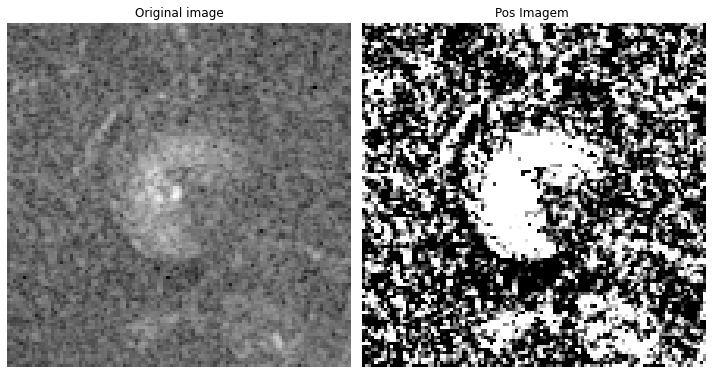

In [ ]:
j = np.random.randint(0,len(x_tr)) # imagem aleatória

img_ant = np.array(x_tr.iloc[j]).reshape((110,110))
img_dep =  np.array(nit_x_tr.iloc[j]).reshape((110,110))

fig, axes = plt.subplots(nrows=1, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(img_ant, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_dep, cmap='gray')
ax[1].set_title('Pos Imagem ')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

## Diminuição da Imagem

Como a imagem é 110x110 e nosso vulcão está no centro dela, podemos diminuir essa imagem para um quadrado com centro na origem e largura menor que 110.

In [ ]:
larg_quad_menor = 30

def dots_out(larg_df = 110, larg = larg_quad_menor):

  x = (larg_df - larg)/2

  idx_o = []

  for i in range(larg):
    linha = np.arange(larg_df*(x+i) + x, larg_df*(x+i) + x + larg)
    for j in linha:
      idx_o.append(int(j)) # índices do quadrado centrado na origem com largura larg_quad_menor

  idx_total = np.arange(0, larg_df**2)

  idx_out = []

  for k in idx_total: # gambiarra
    idx_out.append(int(k))

  for z in idx_o:  # removendo os índices do quadrado com centro na origem e largura larg_quad_menor
    idx_out.remove(z)

  return idx_out

### Diminuindo a imagem

In [ ]:
idx_out = dots_out()

img_men_tr = nit_x_tr.drop(idx_out, axis = 1) # Imagem 50x50 no conjunto de treino
img_men_tt = nit_x_tt.drop(idx_out, axis = 1) # Imagem 50x50 no conjunto de teste

# Reordenando as colunas das imagens

img_men_tr.columns = [i for i in range(larg_quad_menor**2)]
img_men_tt.columns = [i for i in range(larg_quad_menor**2)]

## Modelos de Classificação que iremos utilizar

In [ ]:
SS = StandardScaler()
NB = GaussianNB()
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
SVC_lin = SGDClassifier(loss = 'hinge')
SVC_rbf = SVC(kernel = 'rbf')
SVC_poly = SVC(kernel = 'poly')

## Usando validação cruzada para achar os melhores hiperparâmetros

Para cada uma das métricas que iremos utilizar nesse projeto, temos que:

- Precision: A porcentagem de verdadeiro-positivo dentre todas as predições positivas (Falso-positivo e Verdadeiro-Positivo).
- Accuracy: Métrica para avalizar os acertos gerais (Verdadeiro-positivo e Verdadeiro-Negativo / qntd de dados)
- Recall: A porcentagem de verdadeiro-positivo dentre todos os dados positivos
- F1: Média entre Recall e Precision

O intuito do algoritmo é encontrar vulcões na superfície de Vênus, imagino que para estudos do solo e/ou mapeamento. A partir dessa pesperctiva, não mapear ou não estudar o solo de um vulcão que existe é muito mais problemático do que mapear ou estudar uma superfície sem vulcão (pensando que lá exista um).

Dessa forma, iremos priorizar a métrica de Recall para minimizarmos os falsos-negativos

### Naives Bayes Gaussiano

In [ ]:
Pipe_NB = Pipeline(steps=[("Scaler", SS), ("NB", NB)])

param_grid_NB =  {"NB__var_smoothing": [ 1e-12, 1e-9,  1, 10, 100, 1000] }

Pipe_NBCV = GridSearchCV(Pipe_NB, param_grid = param_grid_NB, scoring='recall', cv = 5)
Pipe_NBCV.fit(img_men_tr, y_tr)

print(Pipe_NBCV.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('NB', GaussianNB(var_smoothing=1))])


### LDA

In [ ]:
Pipe_LDA = Pipeline(steps=[("Scaler", SS), ("LDA", LDA)])

param_grid_LDA =  {"LDA__solver": ['svd', 'lsqr', 'eigen']}

Pipe_LDACV = GridSearchCV(Pipe_LDA, param_grid = param_grid_LDA, scoring='recall', cv = 5)
Pipe_LDACV.fit(img_men_tr, y_tr)

print(Pipe_LDACV.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('LDA', LinearDiscriminantAnalysis())])


### QDA

In [ ]:
Pipe_QDA = Pipeline(steps=[("Scaler", SS), ("QDA", QDA)])

param_grid_QDA =  {"QDA__reg_param": [1e-10, 1e-1, 1/5, 1, 10, 100]}

Pipe_QDACV = GridSearchCV(Pipe_QDA, param_grid = param_grid_QDA, scoring='recall', cv = 5)
Pipe_QDACV.fit(img_men_tr, y_tr)

print(Pipe_QDACV.best_estimator_)

/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminan

Pipeline(steps=[('Scaler', StandardScaler()),
                ('QDA', QuadraticDiscriminantAnalysis(reg_param=1))])


### SVC - Kernel Linear

In [ ]:
Pipe_SVC_lin = Pipeline(steps=[("Scaler", SS), ("SVC_lin", SVC_lin)])

param_grid_SVC_lin =  {"SVC_lin__penalty": [ 'l1','l2','elasticnet', None],
                       "SVC_lin__alpha"  : [ 0.1, 1, 10, 100]}

Pipe_SVCCV_lin = GridSearchCV(Pipe_SVC_lin, param_grid = param_grid_SVC_lin, scoring='recall', cv = 3, n_jobs = -1)
Pipe_SVCCV_lin.fit(img_men_tr, y_tr)

print(Pipe_SVCCV_lin.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('SVC_lin', SGDClassifier(alpha=1, penalty=None))])


### SVC - Kernel RBF

In [ ]:
Pipe_SVC_rbf = Pipeline(steps=[("Scaler", SS), ("SVC_rbf", SVC_rbf)])

param_grid_SVC_rbf =  {"SVC_rbf__C": [ 0.1, 1, 5, 10, 100],
                       "SVC_rbf__gamma": ['scale','auto']
                     }

Pipe_SVCCV_rbf = GridSearchCV(Pipe_SVC_rbf, param_grid = param_grid_SVC_rbf, scoring='recall', cv = 3, n_jobs = -1)
Pipe_SVCCV_rbf.fit(img_men_tr, y_tr)

print(Pipe_SVCCV_rbf.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()), ('SVC_rbf', SVC(C=5))])


### SVC - Kernel Poly

In [ ]:
Pipe_SVC_poly = Pipeline(steps=[("Scaler", SS), ("SVC_poly", SVC_poly)])

param_grid_SVC_poly =  {"SVC_poly__C":     [0.01, 0.1, 1, 10],
                        'SVC_poly__degree': [1, 3, 5, 10]
                     }

Pipe_SVCCV_poly = GridSearchCV(Pipe_SVC_poly, param_grid = param_grid_SVC_poly, scoring='recall', cv = 3, n_jobs = -1)
Pipe_SVCCV_poly.fit(img_men_tr, y_tr)

print(Pipe_SVCCV_poly.best_estimator_)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('SVC_poly', SVC(C=10, degree=1, kernel='poly'))])


## Fazendo as previsões dos modelos

### Naives Bayes Gaussiano

In [ ]:
y_tt_pred_menor = Pipe_NBCV.predict(img_men_tt)

array([1, 0, 1, ..., 1, 0, 1])

Scores

In [ ]:
print('Precisão:', precision_score(y_tt, y_tt_pred_menor))
print('Acurácia:', accuracy_score(y_tt, y_tt_pred_menor))
print('Recall Score:', recall_score(y_tt, y_tt_pred_menor) )
print('F1:', f1_score(y_tt, y_tt_pred_menor) )

Precisão: 0.5396551724137931
Acurácia: 0.8580833942940747
Recall Score: 0.7211981566820277
F1: 0.6173570019723866


Matriz de confusão

In [ ]:
confusion_matrix(y_tt, y_tt_pred_menor)

array([[2033,  267],
       [ 121,  313]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


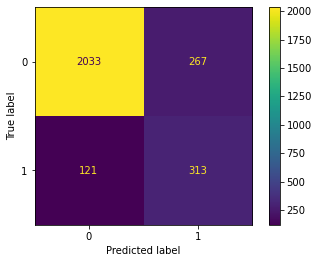

In [ ]:
plot_confusion_matrix(Pipe_NBCV, img_men_tt, y_tt)
plt.show()

### LDA

In [ ]:
y_tt_pred_menor = Pipe_LDACV.predict(img_men_tt)

Scores

In [ ]:
print('Precisão:', precision_score(y_tt, y_tt_pred_menor))
print('Acurácia:', accuracy_score(y_tt, y_tt_pred_menor))
print('Recall Score:', recall_score(y_tt, y_tt_pred_menor) )
print('F1:', f1_score(y_tt, y_tt_pred_menor) )

Precisão: 0.8392857142857143
Acurácia: 0.9107534747622531
Recall Score: 0.5414746543778802
F1: 0.658263305322129


Matriz de confusão

In [ ]:
confusion_matrix(y_tt, y_tt_pred_menor)

array([[2255,   45],
       [ 199,  235]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


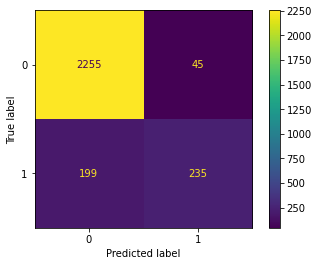

In [ ]:
plot_confusion_matrix(Pipe_LDACV, img_men_tt, y_tt)
plt.show()

### QDA

In [ ]:
y_tt_pred_menor = Pipe_QDACV.predict(img_men_tt)

Scores

In [ ]:
print('Precisão:', precision_score(y_tt, y_tt_pred_menor))
print('Acurácia:', accuracy_score(y_tt, y_tt_pred_menor))
print('Recall Score:', recall_score(y_tt, y_tt_pred_menor) )
print('F1:', f1_score(y_tt, y_tt_pred_menor) )

Precisão: 0.5930470347648262
Acurácia: 0.8745427944403804
Recall Score: 0.6682027649769585
F1: 0.6283856988082341


Matriz de confusão

In [ ]:
confusion_matrix(y_tt, y_tt_pred_menor)

array([[2101,  199],
       [ 144,  290]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


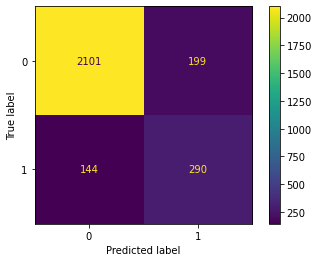

In [ ]:
plot_confusion_matrix(Pipe_QDACV, img_men_tt, y_tt)
plt.show()

### SVC - Kernel Linear

In [ ]:
y_tt_pred_menor = Pipe_SVCCV_lin.predict(img_men_tt)

Scores

In [ ]:
print('Precisão:', precision_score(y_tt, y_tt_pred_menor))
print('Acurácia:', accuracy_score(y_tt, y_tt_pred_menor))
print('Recall Score:', recall_score(y_tt, y_tt_pred_menor) )
print('F1:', f1_score(y_tt, y_tt_pred_menor) )

Precisão: 0.2863514719000892
Acurácia: 0.6660570592538405
Recall Score: 0.7396313364055299
F1: 0.41286173633440515


Matriz de confusão

In [ ]:
confusion_matrix(y_tt, y_tt_pred_menor)

array([[1500,  800],
       [ 113,  321]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


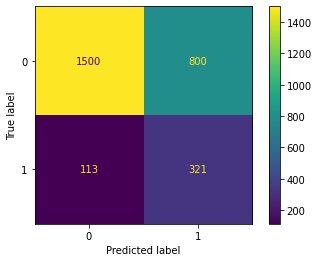

In [ ]:
plot_confusion_matrix(Pipe_SVCCV_lin, img_men_tt, y_tt)
plt.show()

### SVC - Kernel RBF

In [ ]:
y_tt_pred_menor = Pipe_SVCCV_rbf.predict(img_men_tt)

Scores

In [ ]:
print('Precisão:', precision_score(y_tt, y_tt_pred_menor))
print('Acurácia:', accuracy_score(y_tt, y_tt_pred_menor))
print('Recall Score:', recall_score(y_tt, y_tt_pred_menor) )
print('F1:', f1_score(y_tt, y_tt_pred_menor) )

Precisão: 0.8939393939393939
Acurácia: 0.9553767373811266
Recall Score: 0.815668202764977
F1: 0.8530120481927711


Matriz de Confusão

In [ ]:
confusion_matrix(y_tt, y_tt_pred_menor)

array([[2258,   42],
       [  80,  354]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


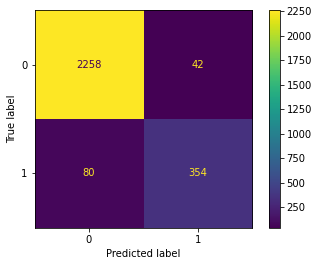

In [ ]:
plot_confusion_matrix(Pipe_SVCCV_rbf, img_men_tt, y_tt)
plt.show()

### SVC - Kernel Poly

In [ ]:
y_tt_pred_menor = Pipe_SVCCV_poly.predict(img_men_tt)

Scores

In [ ]:
print('Precisão:', precision_score(y_tt, y_tt_pred_menor))
print('Acurácia:', accuracy_score(y_tt, y_tt_pred_menor))
print('Recall Score:', recall_score(y_tt, y_tt_pred_menor) )
print('F1:', f1_score(y_tt, y_tt_pred_menor) )

Precisão: 0.8279569892473119
Acurácia: 0.9081931236283833
Recall Score: 0.532258064516129
F1: 0.6479663394109396


Matriz de Confusão

In [ ]:
confusion_matrix(y_tt, y_tt_pred_menor)

array([[2252,   48],
       [ 203,  231]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


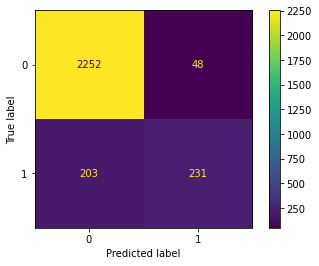

In [ ]:
plot_confusion_matrix(Pipe_SVCCV_poly, img_men_tt, y_tt)
plt.show()

## Conclusão

O melhor classificador para minimizar os falsos-negativos foi o de SVC com Kernel rbf com as seguintes métricas:

- Precisão: 0.89
- Acurácia: 0.95
- Recall Score: 0.81
- F1: 0.85